In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.svm import SVR

In [2]:
## read the dataset
df = pd.read_csv('BTC-USD_train.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [4]:
# remove date column
df.drop(['Date'],1,inplace=True)
df = df[['Close']]

<ipython-input-4-d2e2b6a31f24>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Date'],1,inplace=True)


In [5]:
df.head()

,Close
0,457.334015
1,424.440002
2,394.795990
3,408.903992
4,398.821014


In [6]:
predictionDays = 30
# Create another column shifted 'n'  units up
df['Prediction'] = df[['Close']].shift(-predictionDays)
# show the first 5 rows
df.head()

,Close,Prediction
0,457.334015,383.757996
1,424.440002,391.441986
2,394.795990,389.545990
3,408.903992,382.845001
4,398.821014,386.475006


In [7]:
df.tail()

,Close,Prediction
2736,39338.785156,NaN
2737,41143.929688,NaN
2738,40951.378906,NaN
2739,41801.156250,NaN
2740,42190.652344,NaN


In [8]:
# Create the independent data set
# Here we will convert the data frame into a numpy array and drp the prediction column
x = np.array(df.drop(['Prediction'],1))
# Remove the last 'n' rows where 'n' is the predictionDays
x = x[:len(df)-predictionDays]
print(x)

[[  457.334015]
 [  424.440002]
 [  394.79599 ]
 ...
 [44575.203125]
 [43961.859375]
 [40538.011719]]


<ipython-input-8-afce0adf90e5>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(df.drop(['Prediction'],1))


In [9]:
# Create the dependent data set
# convert the data frame into a numpy array
y = np.array(df['Prediction'])
# Get all the values except last 'n' rows
y = y[:-predictionDays]
print(y)

[  383.757996   391.441986   389.54599  ... 40951.378906 41801.15625
 42190.652344]


In [10]:
## train test split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2)

# set the predictionDays array equal to last 30 rows from the original data set
predictionDays_array = np.array(df.drop(['Prediction'],1))[-predictionDays:]
print(predictionDays_array)

[[40030.976563]
 [40122.15625 ]
 [38431.378906]
 [37075.28125 ]
 [38286.027344]
 [37296.570313]
 [38332.609375]
 [39214.21875 ]
 [39105.148438]
 [37709.785156]
 [43193.234375]
 [44354.636719]
 [43924.117188]
 [42451.789063]
 [39137.605469]
 [39400.585938]
 [38419.984375]
 [38062.039063]
 [38737.269531]
 [41982.925781]
 [39437.460938]
 [38794.972656]
 [38904.011719]
 [37849.664063]
 [39666.753906]
 [39338.785156]
 [41143.929688]
 [40951.378906]
 [41801.15625 ]
 [42190.652344]]


<ipython-input-10-5a42ef0d1284>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  predictionDays_array = np.array(df.drop(['Prediction'],1))[-predictionDays:]


In [11]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000, 10000],
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
			'kernel': ['rbf']}

grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(xtrain, ytrain)

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.127 total time=   0.2s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.110 total time=   0.2s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.102 total time=   0.2s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.092 total time=   0.2s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.097 total time=   0.2s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.127 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.110 total time=   0.2s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.102 total time=   0.2s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.092 total time=   0.2s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.097 total time=   0.2s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.127 total time=   0.2s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

In [20]:
## SVR
svr_rbf = SVR(kernel='rbf', C=10000, gamma=0.0001)
svr_rbf.fit(xtrain, ytrain)

SVR(C=10000, gamma=0.0001)

In [21]:
## testing
svr_rbf_confidence = svr_rbf.score(xtest,ytest)
print('SVR_RBF accuracy :',svr_rbf_confidence)

SVR_RBF accuracy : 0.8851748358520776


In [22]:
# print the predicted values
svm_prediction = svr_rbf.predict(xtest)
print(svm_prediction)
print()
print(ytest)

[43603.85318842  8428.46757209 30358.17945462  9101.22217491
  4324.05746789  4589.89547855   489.92692778   245.90519071
 44187.36498058   255.03880817  3939.9967505   9188.39390594
   237.83982028   405.06386665 34636.81158366  8403.0086274
 12139.33415119 56416.02349227   627.80946076  8389.44644097
  3654.45570629 37824.32746242 36729.73735365   252.833898
  5863.87884519  2469.20819053   404.20376597  8594.19155383
 45770.62579704  1191.23560738 41158.69168433  7333.5496553
   247.60735893   254.80299893   244.51649999  1631.11934029
 29513.05874103  4137.48333782   255.22317045 30457.98304743
  6555.51439185  8813.1408716   9132.05528146 34482.20478202
  6497.90150439  8517.66477067 31371.47873276 11902.67801527
   608.09622137  9658.741017    9239.80759056  7900.24512891
  6349.64777233 34676.99253157  9263.94017699  3677.3393212
 13006.60894904   254.6736689    403.12788825  6486.35847292
 29407.33667821  9348.25120961 20589.91861844   610.41551482
  8891.15150498   651.6779712

In [23]:
# Print the model predictions for the next 30 days
svm_prediction = svr_rbf.predict(predictionDays_array)
print(svm_prediction)
print()
#Print the actual price for bitcoin for last 30 days
print(df.tail(predictionDays))

[47119.91767335 33633.86352476 37063.26472511 35772.60526732
 32624.05687423 35951.9663384  31127.37125576 41694.42767938
 33274.31052818 34532.42834826 41980.27891171 40048.58191542
 42676.42258061 36382.8573245  36531.47576673 37970.69816678
 36131.42464813 32604.64729089 35795.42010195 36124.75399686
 37801.60889772 38035.94306919 40054.81031569 39846.08555706
 29419.26122268 34918.12288905 32436.55408871 39886.25508715
 42850.5013148  38475.29142039]

             Close  Prediction
2711  40030.976563         NaN
2712  40122.156250         NaN
2713  38431.378906         NaN
2714  37075.281250         NaN
2715  38286.027344         NaN
2716  37296.570313         NaN
2717  38332.609375         NaN
2718  39214.218750         NaN
2719  39105.148438         NaN
2720  37709.785156         NaN
2721  43193.234375         NaN
2722  44354.636719         NaN
2723  43924.117188         NaN
2724  42451.789063         NaN
2725  39137.605469         NaN
2726  39400.585938         NaN
2727  38419.9

In [24]:
for i in range(30):
  df['Prediction'][i]=svm_prediction[i]

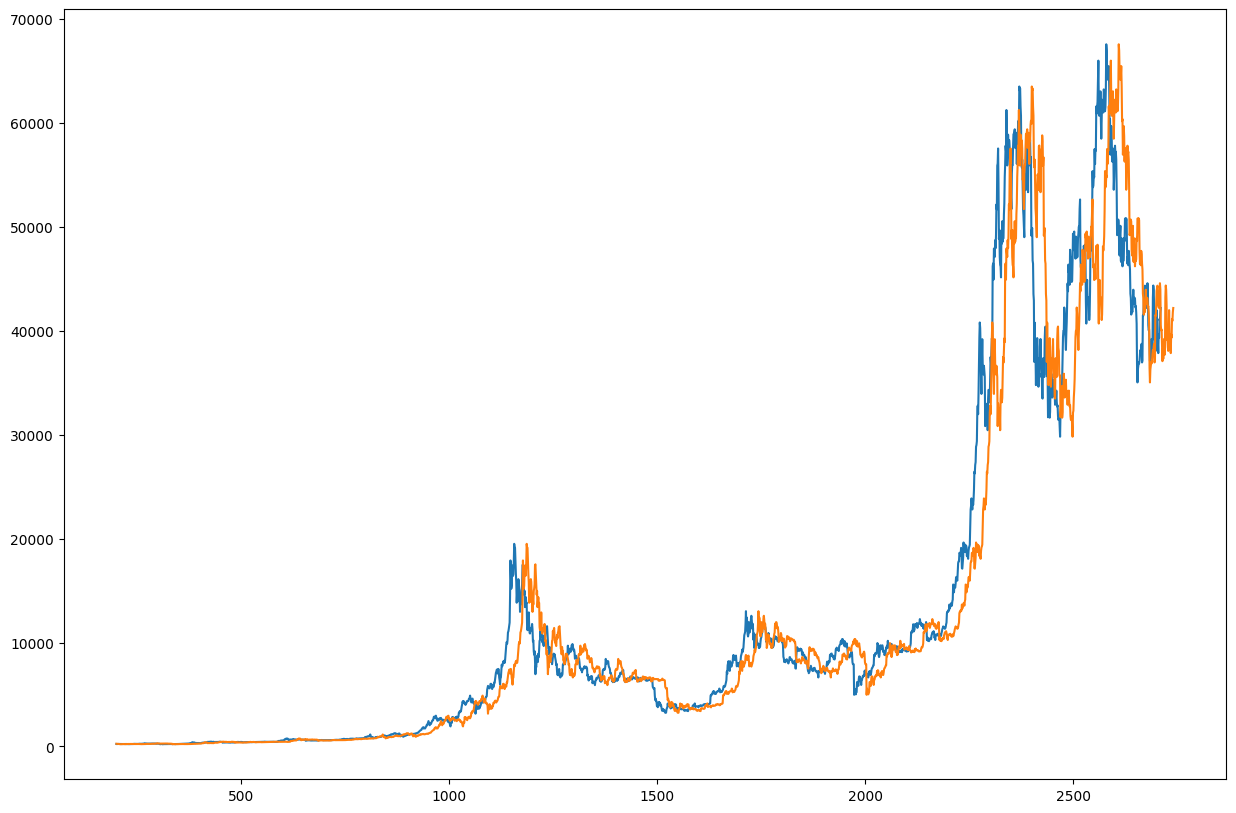

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(df['Prediction'][200:])
plt.plot(df['Close'][200:])
plt.show()